# Imports

In [1]:
import importlib
import functions as f  # Our defined functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
from tqdm.notebook import tqdm
import os
import math
import time

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

importlib.reload(f)

GRatio = (1 + 5 ** .5) / 2

WIDTH = .5
DASH = (10, 10)


# Solving models

[ 0  6 12 18 24 30 36]
{'Rt(S,I)': 1.5999760922056316}


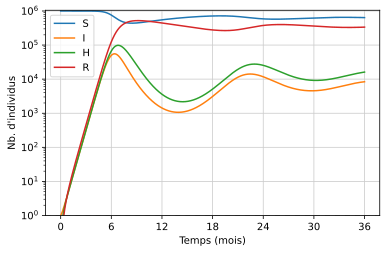

98387.32895488739


In [11]:
importlib.reload(f)


t_final = {
    'SIRS_vars': 150,
    'SIRS_deaths': 120,
    'SIR_test3': 150,
    'SIS_deaths_2': 150,
    'SIS': 100,
    'SIR_betajump20': 125,
    'SIR': 125,
    'SIR_I_sep': 50,
    'SIR2': 125,
    'SIR3': 200,
    'SIR_vars': 200,
    'hospitalized': 36
}


for modelName in ['hospitalized']:

    model = f.loadModel(modelName, printText=False)
    solution, t_span = f.solve(model, (0, t_final[modelName]), 100)

    labels = f.getCompartments(model)

    if modelName == 'SIR_I_sep':
        def combine(sol):
            newSolution = np.zeros((sol.shape[0], sol.shape[1] - 2))

            newSolution[:, 0] = sol[:, 0]
            newSolution[:, 1] = sol[:, 1] + sol[:, 2] + sol[:, 3]
            newSolution[:, 2] = sol[:, 4]
            newSolution[:, 3] = sol[:, 5]
            newSolution[:, 4] = sol[:, 6]

            return newSolution, sol, ['S', 'I', 'R', 'Null_n', 'Null_m']

        solution, oldSolution, labels = combine(solution)

    nullmPos = labels.index('Null_m')
    nullnPos = labels.index('Null_n')

    solution[:, nullmPos] = - solution[:, nullmPos]
    curvesToPlot = list(range(solution.shape[1]))

    diffNullm = np.max(np.abs(solution[:, nullmPos] - solution[0, nullmPos]))
    diffNulln = np.max(np.abs(solution[:, nullnPos] - solution[0, nullnPos]))
    if diffNullm < 1:
        curvesToPlot.remove(nullmPos)
    if diffNulln < 1:
        curvesToPlot.remove(nullnPos)

    fig = plt.figure(figsize=(6, 6/GRatio))
    f.plotCurves(t_span,
                 np.transpose(solution),
                 toPlot=curvesToPlot,
                 labels=labels,
                 title=modelName if modelName != 'hospitalized' else '',
                 scales=['linear', 'linear'],
                 xlabel='Temps (jours)'
                 if modelName != 'hospitalized'
                 else 'Temps (mois)',
                 ylabel='Nb. d\'individus')

    # additional curves
    # plt.plot(t_span, f.infCurve(model, solution if
    #                             modelName != 'SIR_I_sep'
    #                             else oldSolution, t_span),
    #          label='$\\nu$', c='#8E4585')
    N = np.array([f.getPopulation(model, x)['Sum']
                  for x in solution])
    diffN = np.max(np.abs(N - N[0]))
    if diffN > 1:
        plt.plot(t_span, N, label='$N$', c='#8E4585')

    # lines
    plt.ylim(bottom=1)
    plt.axhline(y=1, linestyle='--', color='grey',
                linewidth=WIDTH, dashes=DASH)
    plt.yscale('log')

    print(np.arange(0, t_final[modelName] + 1, 6))
    plt.xticks(np.arange(0, t_final[modelName] + 1, 6))

    f.mod(model, printText=False)

    model, modelMod, _, r0 = f.computeR0(
        modelName, (0, 300), printInit=False, printWarnings=False,
        scaledInfs=False, printText=False)

    print(r0)

    plt.legend(loc='best')
    plt.grid(axis='both', color='.80')
    fig.savefig(f'graphs/curves_{modelName}.pdf', bbox_inches='tight')
    plt.show()

    if modelName == 'hospitalized':
        hIndex = labels.index('H')
        print(np.max(solution[:, hIndex]))


# $\mathcal{R}_t$ curves

In [3]:
parameters = {
    'SIR_deaths': {
        't_span_rt': (0, 80),
        'R0': 4,
        'legendLoc': 'center left'
    },
    'SIR_vars': {
        't_span_rt': (40, 90),
        'R0': 10,
        'legendLoc': 'center left'
    },
    'SIR_test2': {
        't_span_rt': (0, 175),
        'R0': 4,
        'legendLoc': 'center left'
    },
    'SIRS_vacc_morts': {
        't_span_rt': (0, 200),
        'R0': 32 / 15,
        'legendLoc': 'center left'
    },
    'SI': {
        't_span_rt': (0, 60),
        'R0': 0,
        'legendLoc': 'best'
    },
    'SIR': {
        't_span_rt': (0, 50),
        'R0': 4,
        'legendLoc': 'upper right'
    },
    'SIR_I_sep': {
        't_span_rt': (0, 50),
        'R0': 4,
        'legendLoc': 'upper right'
    },
    'SIR copy': {
        't_span_rt': (0, 50),
        'R0': 2,
        'legendLoc': 'upper right'
    },
    'SIR2': {
        't_span_rt': (0, 50),
        'R0': 4,
        'legendLoc': 'center left'
    },
    'SIR_betajump20': {
        't_span_rt': (0, 50),
        'R0': 3,
        'legendLoc': 'upper right'
    },
    'SIR_gammajump20': {
        't_span_rt': (0, 50),
        'R0': 3,
        'legendLoc': 'upper right'
    },
    'SIR3': {
        't_span_rt': (0, 200),
        'R0': 3,
        'legendLoc': 'center left'
    }
}

  0%|          | 0/51 [00:00<?, ?it/s]

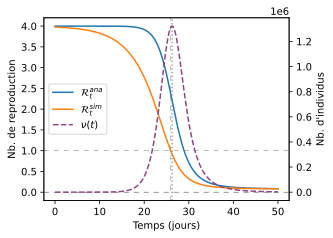

  0%|          | 0/201 [00:00<?, ?it/s]

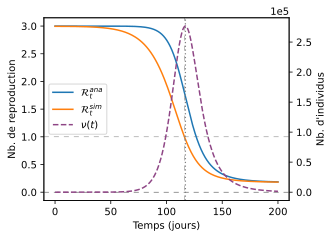

In [4]:
importlib.reload(f)

for name in ['SIR2', 'SIR3']:
    rtCurves = \
        f.compare(name, **parameters[name], sub_rt=1,
                  plotANA=True,
                  plotInfected=True,
                  title='',
                  useLog=False,
                  printText=False,
                  forceColors=False)
    plt.show()


  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

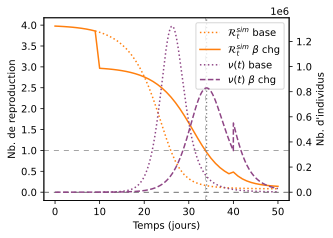

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

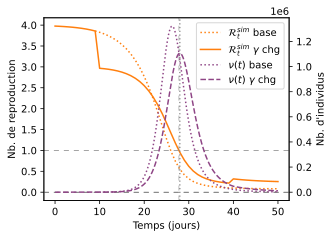

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

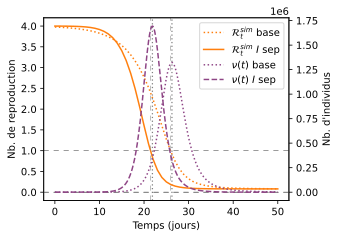

In [5]:
importlib.reload(f)

fig, ax1 = plt.subplots(figsize=(4*1.1, 3*1.1))
ax2 = ax1.twinx()

rtCurves = \
    f.compare('SIR', **parameters['SIR'], sub_rt=1,
              plotANA=False, plotANA_v2=False,
              susceptibles=[0],
              plotBound=False,
              plotInfected=True,
              title='',
              useLog=False,
              printText=False,
              whereToPlot=(fig, ax1, ax2),
              plotStyle=':',
              forceColors=True,
              drawVertical=False,
              saveGraph=False,
              plotFrom=10,
              addToLegends=' base')
rtCurves = \
    f.compare('SIR_betajump20', **parameters['SIR_betajump20'], sub_rt=1,
              plotANA=False, plotANA_v2=False,
              susceptibles=[0],
              plotBound=False,
              plotInfected=True,
              title='',
              useLog=False,
              printText=False,
              whereToPlot=(fig, ax1, ax2),
              forceColors=True,
              saveGraph=True,
              graphName='betaJump',
              printR0=False,
              addToLegends=' $\\beta$ chg')
plt.show()

importlib.reload(f)

fig, ax1 = plt.subplots(figsize=(4*1.1, 3*1.1))
ax2 = ax1.twinx()

rtCurves = \
    f.compare('SIR', **parameters['SIR'], sub_rt=1,
              plotANA=False, plotANA_v2=False,
              susceptibles=[0],
              plotBound=False,
              plotInfected=True,
              title='',
              useLog=False,
              printText=False,
              whereToPlot=(fig, ax1, ax2),
              plotStyle=':',
              forceColors=True,
              drawVertical=False,
              saveGraph=False,
              plotFrom=10,
              addToLegends=' base')
rtCurves = \
    f.compare('SIR_gammajump20', **parameters['SIR_gammajump20'], sub_rt=1,
              plotANA=False, plotANA_v2=False,
              susceptibles=[0],
              plotBound=False,
              plotInfected=True,
              title='',
              useLog=False,
              printText=False,
              whereToPlot=(fig, ax1, ax2),
              forceColors=True,
              saveGraph=True,
              graphName='gammaJump',
              printR0=False,
              addToLegends=' $\\gamma$ chg')
plt.show()

importlib.reload(f)

fig, ax1 = plt.subplots(figsize=(4*1.1, 3*1.1))
ax2 = ax1.twinx()

rtCurves = \
    f.compare('SIR', **parameters['SIR'], sub_rt=1,
              plotANA=False, plotANA_v2=False,
              susceptibles=[0],
              plotBound=False,
              plotInfected=True,
              title='',
              useLog=False,
              printText=False,
              whereToPlot=(fig, ax1, ax2),
              plotStyle=':',
              forceColors=True,
              drawVertical=True,
              saveGraph=False,
              addToLegends=' base')
rtCurves = \
    f.compare('SIR_I_sep', **parameters['SIR_I_sep'], sub_rt=1,
              plotANA=False, plotANA_v2=False,
              susceptibles=[0],
              plotBound=False,
              plotInfected=True,
              title='',
              useLog=False,
              printText=False,
              whereToPlot=(fig, ax1, ax2),
              forceColors=True,
              saveGraph=True,
              graphName='infectedSep',
              printR0=False,
              addToLegends=' $I$ sep')
plt.show()


In [6]:
importlib.reload(f)

for name in  \
    ['SIS_deaths', 'SIS_vacc',
     'SIRS_deaths', 'SIS_deaths_2',
     'SIR_vars', 'SIR_test2',
     'SIR_deaths', 'SIR_test', 'SIR',
     'SIR_test3', 'SIRS_vars', 'SIRS_vacc_morts',
      'SIR2', 'hospitalized']:

    measures = {
        'layerDistance': 1,
        'nodeDistance': 2,
        'varDistance': .25,
        'nullDistance': .8,
        'baseAngle': 10,
        'contactPositions': ("2/5", "3/5"),
        'scale': 1
    }

    # f.printModel(f.loadModel(name, True, False))

    f.createLaTeX(f.loadModel(name, True, False), **measures)

    f.createLaTeX(f.mod(f.loadModel(name, True, False),
                        overWrite=True), **measures)


Tikz created for SIS_deaths
Tikz created for SIS_deaths_mod
Tikz created for SIS_vacc
Tikz created for SIS_vacc_mod
Tikz created for SIRS_deaths
Tikz created for SIRS_deaths_mod
Tikz created for SIS_deaths_2
Tikz created for SIS_deaths_2_mod
Tikz created for SIR_vars
Tikz created for SIR_vars_mod
Tikz created for SIR_test2
Tikz created for SIR_test2_mod
Tikz created for SIR_deaths
Tikz created for SIR_deaths_mod
Tikz created for SIR_test
Tikz created for SIR_test_mod
Tikz created for SIR
Tikz created for SIR_mod
Tikz created for SIR_test3
Tikz created for SIR_test3_mod
Tikz created for SIRS_vars
Tikz created for SIRS_vars_mod
Tikz created for SIRS_vacc_morts
Tikz created for SIRS_vacc_morts_mod
Tikz created for SIR2
Tikz created for SIR2_mod
Tikz created for hospitalized
Tikz created for hospitalized_mod
